# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [7]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import kagglehub
from tqdm import tqdm
from sklearn.model_selection import train_test_split

State the Problem


Respiratory infections, specifically lung diseases are the leading causes of death in Zimbabwe with a combined crude mortality rate of 162.1 deaths per 100,000 people. According to T.C Mando et al ., over 12000 cases of Tuberculosis were missed in Zimbabwe in 2020 alone due to delays and misclassification in the presumptive TB case detection process, where patients were not identified early or accurately. The gaps in early identification, diagnosis, treatment adherence and outcome evaluation continue the rise in respiratory infections such as Tuberculosis. Moreover, most people who suffer from these respiratory diseases have underlying conditions, 75% of tuberculosis cases occur among HIV-positive individuals, making it crucial to have a more effective system for early detection and treatment.


A short Description of the data

The data is X-ray image data and it is put in 9 clases namely Lungs Cancer, Normal, Atelectasis, Edema, Pneumothorax,Pneumonia, COVID-19, Consolidation Lung and Tuberculosis

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hamu1772/lung-disease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lung-disease


In [9]:
path = r"/kaggle/input/lung-disease/Chest Diseases Dataset (2)"

In [10]:

print("Files in dataset folder:", os.listdir(path))


Files in dataset folder: ['2. Lungs Cancer', '9. Normal', '4. Atelectasis', '7. Edema', '6. Pneumothorax', '8. Pneumonia', '1. COVID-19', '3. Consolidation Lung', '5. Tuberculosis']


# Data preprocessing

function 

In [11]:
import os
from sklearn.model_selection import train_test_split
import numpy as np



X = []  # images
Y = []  # labels
labels = {}  # label mapping dict

# Get all the folder names (diseases)
folders = sorted(os.listdir(path))

# Assign labels to each folder (disease)
for idx, disease in enumerate(folders):
    labels[disease] = idx

# Iterate over each folder (disease) and collect image file paths and labels
for disease in folders:
    disease_path = os.path.join(path, disease)
    
    # Assuming there's a subfolder with images (e.g., "CXR")
    # Check if it's a directory and has a subfolder containing images
    subfolder_path = os.path.join(disease_path, 'CXR')  # Adjust if the subfolder name is different
    if os.path.isdir(subfolder_path):
        for img_name in os.listdir(subfolder_path):
            # Add the image path and label
            img_path = os.path.join(subfolder_path, img_name)
            X.append(img_path)
            Y.append(labels[disease])

# Convert to numpy arrays for train_test_split
X = np.array(X)
Y = np.array(Y)
# Print dataset statistics
print(f"Total images: {len(X)}")



Total images: 20779


In [37]:
X


array(['/kaggle/input/lung-disease/Chest Diseases Dataset (2)/1. COVID-19/CXR/COVID-1994.png',
       '/kaggle/input/lung-disease/Chest Diseases Dataset (2)/1. COVID-19/CXR/COVID-1825.png',
       '/kaggle/input/lung-disease/Chest Diseases Dataset (2)/1. COVID-19/CXR/COVID-517.png',
       ...,
       '/kaggle/input/lung-disease/Chest Diseases Dataset (2)/9. Normal/CXR/IM-0162-0001.jpeg',
       '/kaggle/input/lung-disease/Chest Diseases Dataset (2)/9. Normal/CXR/NORMAL2-IM-1247-0001.jpeg',
       '/kaggle/input/lung-disease/Chest Diseases Dataset (2)/9. Normal/CXR/IM-0219-0001.jpeg'],
      dtype='<U98')

In [12]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split


def create_directories(base_dir, labels):
    for phase in ['train', 'validation', 'test']:
        phase_dir = os.path.join(base_dir, phase)
        
        os.makedirs(phase_dir, exist_ok=True)

        for label in labels:
            class_dir = os.path.join(phase_dir, label)
            
            
            os.makedirs(class_dir, exist_ok=True)


def copy_images_to_directories(df, base_dir, phase):
    for _, row in df.iterrows():
        image_path = row['Image']
        label = row['Label']
        
        
        disease = [key for key, value in labels.items() if value == label][0]
        
        
        class_dir = os.path.join(base_dir, phase, disease)
        
        
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        
        
        shutil.copy(image_path, class_dir)


df_x = X.tolist()
df_y = Y.tolist()
df = pd.DataFrame({
    'Image': df_x, 
    'Label': df_y  
})

base_dir = '/kaggle/working/'


create_directories(base_dir, labels)


train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['Label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['Label'], random_state=42)


copy_images_to_directories(train_df, base_dir, 'train')
copy_images_to_directories(val_df, base_dir, 'validation')
copy_images_to_directories(test_df, base_dir, 'test')


print(f"Training set: {len(train_df)}")
print(f"Validation set: {len(val_df)}")
print(f"Test set: {len(test_df)}")


Training set: 16623
Validation set: 2078
Test set: 2078


In [13]:
!ls  /kaggle/working

test  train  validation


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


image_generator = ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    zoom_range=0.1,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.1
)


train_generator = image_generator.flow_from_directory(
    train_dir,
    class_mode="categorical",
    batch_size=64,
    subset='training',  
    seed=1,
    target_size=(224, 224)
)


val_generator = image_generator.flow_from_directory(
    validation_dir,
    class_mode="categorical",
    batch_size=64,
    subset='validation',
    seed=1,
    target_size=(224, 224)
)


test_generator = image_generator.flow_from_directory(
    test_dir,
    class_mode="categorical",
    batch_size=64,
    seed=1,
    target_size=(240, 2400)
)


Found 14964 images belonging to 9 classes.
Found 205 images belonging to 9 classes.
Found 2078 images belonging to 9 classes.


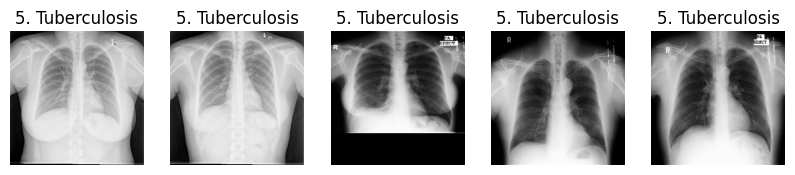

In [15]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing import image


train_dir = os.path.join('/kaggle/working/', 'train')


class_names = os.listdir(train_dir)


random_class = random.choice(class_names)


class_images = os.listdir(os.path.join(train_dir, random_class))


sample_images = random.sample(class_images, 5)


plt.figure(figsize=(10, 10))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(train_dir, random_class, img_name)
    img = image.load_img(img_path, target_size=(320, 320))  # Adjust size as necessary
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(random_class)  # Label the image with the class name

plt.show()


# Model that uses Random forest 

# SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://res.cloudinary.com/dz5rslegb/image/upload/v1740313076/com_1_fqflkk.png" alt="?" style="width:550px"/>




# Task: Define a function that creates models without and With specified Optimization techniques

**Mixed Precision Training**

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def define_model(optimization=None, regularization_datatype=None, early_stopping=False, dropout=0.0, learning_rate=0.001):
    
    if optimization == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimization == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=0.001)  
    
   
    regularizer = l2(0.01) if regularization_datatype == 'l2' else None
    
    
    model_layers = [
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizer, input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
    ]

    
    if dropout > 0:
        model_layers.append(Dropout(dropout))

    
    model_layers.append(Dense(9, activation='softmax'))  # 8 diseases + 1 normal case

  
    model = Sequential(model_layers)

    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    
    if early_stopping:
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        return model, early_stop
    
    return model

# Example Usage
model = define_model()
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
batch_x, batch_y = next(train_generator)
print("Batch X shape:", batch_x.shape)  
print("Batch Y shape:", batch_y.shape) 


Batch X shape: (64, 224, 224, 3)
Batch Y shape: (64, 9)


In [39]:

base = model.fit(train_generator, validation_data=val_generator, epochs=5)

model.save('/kaggle/working/basemodel.h5')

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.7805 - loss: 0.3799 - val_accuracy: 0.7561 - val_loss: 0.4079
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.7803 - loss: 0.3913 - val_accuracy: 0.7561 - val_loss: 0.4282
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.7706 - loss: 0.3968 - val_accuracy: 0.7707 - val_loss: 0.3781
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 241s 1000ms/step - accuracy: 0.7859 - loss: 0.3707 - val_accuracy: 0.7659 - val_loss: 0.3839
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 240s 996ms/step - accuracy: 0.7812 - loss: 0.3623 - val_accuracy: 0.7854 - val_loss: 0.3569


# Task: Print out the Final Model Accuracy and plot the Loss curve

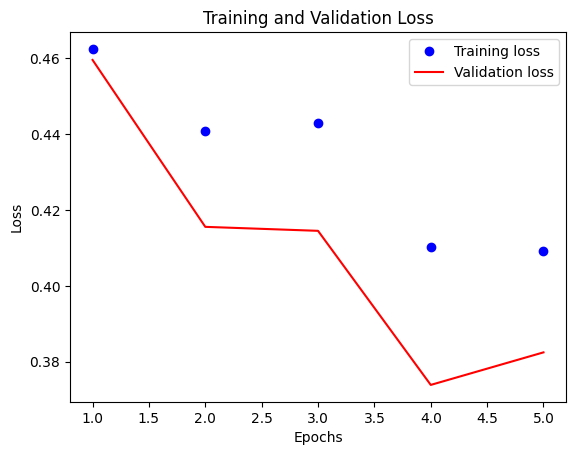

In [36]:
def loss_curve_plot(model):
    epochs = range(1, len(model.history['loss']) + 1)
    plt.plot(epochs, model.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, model.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


loss_curve_plot(base)

In [34]:
import shutil
shutil.make_archive('/kaggle/working/lung_disease_model1', 'zip', '/kaggle/working', 'basemodel.h5')


'/kaggle/working/lung_disease_model1.zip'

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.3907 - loss: 1.8646 - val_accuracy: 0.5951 - val_loss: 0.8973
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.6425 - loss: 0.8255 - val_accuracy: 0.7220 - val_loss: 0.5806
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 236s 977ms/step - accuracy: 0.7091 - loss: 0.6125 - val_accuracy: 0.6927 - val_loss: 0.5458
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.7364 - loss: 0.5239 - val_accuracy: 0.7512 - val_loss: 0.4457
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 239s 992ms/step - accuracy: 0.7431 - loss: 0.4783 - val_accuracy: 0.7512 - val_loss: 0.4966


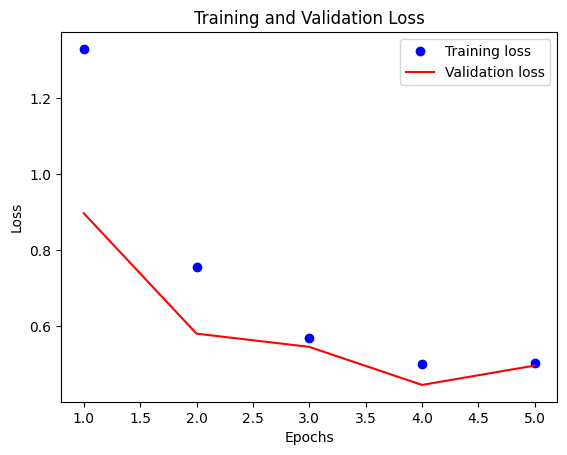

In [40]:
#TODO

#This model use Adam and early stopping
model_2, early_stop = define_model(optimization="Adam", early_stopping=True)

base2 = model_2.fit(train_generator, validation_data=val_generator, epochs=5, callbacks=[early_stop])

loss_curve_plot(base2)
model_2.save('/kaggle/working/model2.h5')

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [ ]:
#This model use Root-mean squared propagatio and early stopping
model_3, early_stop = define_model(optimization="rmsprop", early_stopping=True)

base3 = model_3.fit(train_generator, validation_data=val_generator, epochs=5, callbacks=[early_stop])

loss_curve_plot(base3)
model_3.save("/kaggle/working/model3.h5")

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 238s 987ms/step - accuracy: 0.5995 - loss: 0.9489 - val_accuracy: 0.6683 - val_loss: 0.7538
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 239s 992ms/step - accuracy: 0.7039 - loss: 0.6384 - val_accuracy: 0.6927 - val_loss: 0.5637
Epoch 5/5
174/234 ━━━━━━━━━━━━━━━━━━━━ 1:00 1s/step - accuracy: 0.7181 - loss: 0.5868

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.3686 - loss: 2.6925 - val_accuracy: 0.6488 - val_loss: 0.8157
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 241s 999ms/step - accuracy: 0.6098 - loss: 0.9259 - val_accuracy: 0.6732 - val_loss: 0.7225
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 239s 989ms/step - accuracy: 0.6680 - loss: 0.7463 - val_accuracy: 0.7366 - val_loss: 0.6203
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 241s 998ms/step - accuracy: 0.7036 - loss: 0.6457 - val_accuracy: 0.6927 - val_loss: 0.5746
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 239s 988ms/step - accuracy: 0.7169 - loss: 0.5861 - val_accuracy: 0.5902 - val_loss: 0.9666


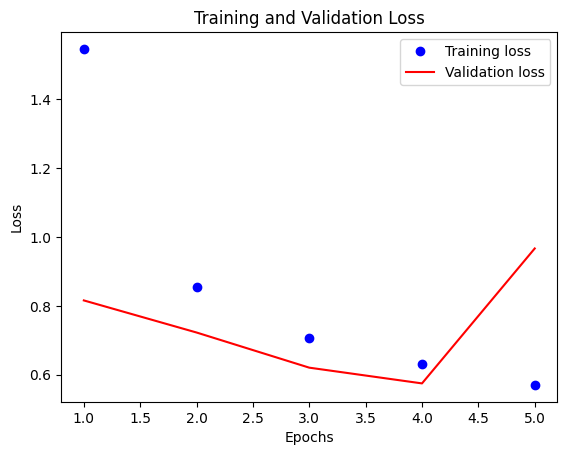

In [49]:
#TODO:
#this model uses root mean squred propagation, early stopping and L2 regulirisation
model_4, early_stop = define_model(optimization="rmsprop", early_stopping=True)

base4 = model_4.fit(train_generator, validation_data=val_generator, epochs=5, callbacks=[early_stop])

loss_curve_plot(base4)

model_4.save("/kaggle/working/model4.h5")
#print out confusion matrix and error analysis metrics after the cell

In [72]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, image_generator, test_dir, batch_size=64, target_size=(224, 224), test_generator=None):
    """
    Evaluate a model on the test data and compute performance metrics.

    Args:
    - model: The trained model to evaluate.
    - image_generator: The ImageDataGenerator instance for preprocessing the images.
    - test_dir: The directory path to the test data.
    - batch_size: The batch size used during evaluation (default is 64).
    - target_size: The target size to which images should be resized (default is (224, 224)).
    - test_generator: Optional pre-created test generator.

    Returns:
    - metrics: Dictionary containing evaluation metrics.
    """
    # If test_generator is not passed, create it
    if test_generator is None:
        test_generator = image_generator.flow_from_directory(
            test_dir,
            class_mode="categorical",
            batch_size=batch_size,
            seed=1,
            target_size=target_size 
        )


    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    
    y_true = test_generator.classes 

    
    y_pred_probs = model.predict(test_generator)  
    y_pred = np.argmax(y_pred_probs, axis=1)  

    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted')

    
    roc_auc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')

    # Print Results
    metrics = {
        "accuracy": accuracy,
        "loss": test_loss,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

    return metrics


model = keras.models.load_model('/kaggle/working/basemodel.h5')
metrics_model = evaluate_model(model, image_generator, '/kaggle/working/test', test_generator=test_generator)
print(metrics_model)


33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 979ms/step - accuracy: 0.7451 - loss: 0.5126
Test Loss: 0.5390113592147827
Test Accuracy: 0.7266602516174316
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 973ms/step
{'accuracy': 0.1554379210779596, 'loss': 0.5390113592147827, 'precision': 0.15305827289622145, 'recall': 0.1554379210779596, 'f1_score': 0.1529292909917211, 'roc_auc': 0.5082753360009353}


In [73]:
model = keras.models.load_model('/kaggle/working/model2.h5')
metrics_model = evaluate_model(model, image_generator, '/kaggle/working/test', test_generator=test_generator)
print(metrics_model)

33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 963ms/step - accuracy: 0.7247 - loss: 0.5551
Test Loss: 0.5533661842346191
Test Accuracy: 0.7309913635253906
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 963ms/step
{'accuracy': 0.16650625601539942, 'loss': 0.5533661842346191, 'precision': 0.164248666349307, 'recall': 0.16650625601539942, 'f1_score': 0.1635483635353408, 'roc_auc': 0.5040934904922829}


In [74]:
model = keras.models.load_model('/kaggle/working/model3.h5')
metrics_model = evaluate_model(model, image_generator, '/kaggle/working/test', test_generator=test_generator)
print(metrics_model)

33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 991ms/step - accuracy: 0.7496 - loss: 0.5185
Test Loss: 0.5385093092918396
Test Accuracy: 0.7309913635253906
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 976ms/step
{'accuracy': 0.14196342637151108, 'loss': 0.5385093092918396, 'precision': 0.13909099969381772, 'recall': 0.14196342637151108, 'f1_score': 0.13906061238285353, 'roc_auc': 0.49990637058150356}


In [76]:
model = keras.models.load_model('/kaggle/working/model4.h5')
metrics_model = evaluate_model(model, image_generator, '/kaggle/working/test', test_generator=test_generator)
print(metrics_model)

33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 985ms/step - accuracy: 0.7451 - loss: 0.5126
Test Loss: 0.5266390442848206
Test Accuracy: 0.7396535277366638
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 973ms/step
{'accuracy': 0.1395572666025024, 'loss': 0.5266390442848206, 'precision': 0.13885902804407246, 'recall': 0.1395572666025024, 'f1_score': 0.13745906428826873, 'roc_auc': 0.4986925693226795}


# 

# Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [90]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

def make_predictions(model_path, X):
    """
    Make predictions using a trained model.

    Args:
    - model_path: Path to the saved model.
    - X: Input data (images or feature vectors).

    Returns:
    - predictions: Binary or class predictions based on the model's output.
    """
  
    model = load_model(model_path)

   
    target_size = (224, 224)
    X_resized = np.array([image.smart_resize(img, target_size) for img in X])

    X_resized = X_resized / 255.0


    predictions_probs = model.predict(X_resized)

  
    if predictions_probs.shape[-1] == 1:
        predictions = (predictions_probs > 0.5).astype(int)
    else:
        predictions = np.argmax(predictions_probs, axis=1)

    return predictions


model_path = '/kaggle/working/model4.h5' 
predictions = make_predictions(model_path, X_test)
print(predictions)




65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
[0 0 0 ... 0 0 0]


Congratulations!!


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_auc_score
from tensorflow.keras.utils import to_categorical
import joblib


def preprocess_data(directory, target_size=(128, 128), batch_size=64):
    
    datagen = ImageDataGenerator(rescale=1./255)

    
    generator = datagen.flow_from_directory(directory, target_size=target_size, batch_size=batch_size, class_mode='categorical')

    
    images = []
    labels = []

    
    for batch_x, batch_y in generator:
        images.append(batch_x)
        labels.append(batch_y)
        
        # Stop after one pass through the data (you can change this if you want to load more data)
        if len(images) * batch_size >= generator.samples:
            break
    
    
    X = np.vstack(images)
    y = np.vstack(labels)

    return X, y, generator.class_indices


train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/validation'
test_dir = '/kaggle/working/test'

X_train, y_train, class_indices = preprocess_data(train_dir)
X_val, y_val, _ = preprocess_data(val_dir)
X_test, y_test, _ = preprocess_data(test_dir)

# Flatten the images (128x128x3) to (128*128*3) for logistic regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# one-hot encoded labels
y_train_flat = np.argmax(y_train, axis=1)
y_val_flat = np.argmax(y_val, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_flat, y_train_flat)


Found 16623 images belonging to 9 classes.
Found 2078 images belonging to 9 classes.
Found 2078 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [32]:

y_pred_proba = logreg.predict_proba(X_test_flat)  # Keep the whole probability array for multi-class

# Predict class labels for accuracy
y_pred = logreg.predict(X_test_flat)


accuracy = accuracy_score(y_test_flat, y_pred)
loss = log_loss(y_test_flat, y_pred_proba, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

report = classification_report(y_test_flat, y_pred, output_dict=True)

# Class-specific metrics for class '1'
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']


roc_auc = roc_auc_score(y_test_flat, y_pred_proba, multi_class='ovr')


print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {loss:.4f}")
print(f"Precision (Class 1): {precision:.4f}")
print(f"Recall (Class 1): {recall:.4f}")
print(f"F1-Score (Class 1): {f1_score:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


joblib.dump(logreg, 'logistic_regression_classifier.joblib')
print("Logistic Regression Classifier saved!")


Accuracy: 0.5149
Log Loss: 1.3681
Precision (Class 1): 0.8527
Recall (Class 1): 0.8505
F1-Score (Class 1): 0.8516
ROC-AUC: 0.9073
Logistic Regression Classifier saved!
